In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

2024-08-01 11:40:36.812752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 11:40:36.836675: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 11:40:36.844183: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 11:40:36.863785: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 11:40:43.591320: W tensorflow/compiler/tf2

In [1]:
def extract_scalars_from_events_file(file_path):
    # Initialize the EventAccumulator
    ea = event_accumulator.EventAccumulator(file_path)
    ea.Reload()

    # Get the list of all scalar tags
    scalar_tags = ea.Tags()["scalars"]

    # Extract scalar data
    data = {}
    for tag in scalar_tags:
        events = ea.Scalars(tag)
        steps = [event.step for event in events]
        values = [event.value for event in events]
        data[tag] = (steps, values)

    return data


def plot_scalar_data(data):
    for tag, (steps, values) in data.items():
        plt.plot(steps, values, label=tag)
        break

    plt.xlabel("Steps")
    plt.ylabel("Values")
    plt.title("Scalar Data from .tfevents")
    plt.legend()
    plt.show()

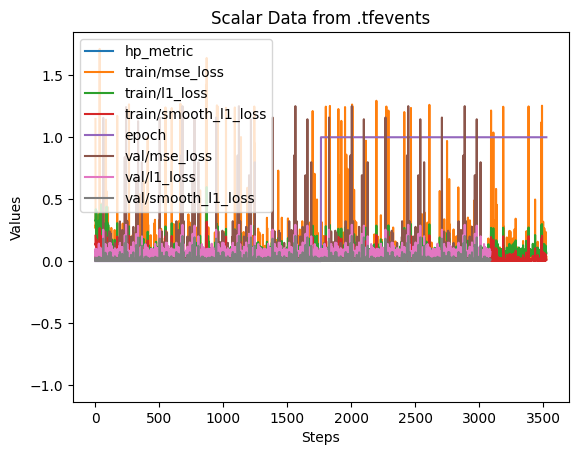

In [10]:
# Path to your .tfevents file
file_path = "/work/tc064/tc064/s2567498/virtual-sensing/lightning_logs/mamba/version_5/events.out.tfevents.1722416608.r2i7n8.276037.0"

# Extract and plot the data
scalar_data = extract_scalars_from_events_file(file_path)
plot_scalar_data(scalar_data)